# Capstone Two - 5 Extended Modeling<a id='5'></a>

## 5.1 Contents<a id='5.1'></a>
* [5 Extended Modeling](#5)
  * [5.1 Contents](#5.1)
  * [5.2 Imports](#5.2)
  * [5.3 Load The Data](#5.3)
  * [5.4 Data Processing](#5.4)
  * [5.5 Modeling](#5.5)
    * [5.5.1 Apply auto_arima() for single timeseries](#5.5.1)
    * [5.5.2 Apply auto_arima() for multiple timeseries](#5.5.2)
    * [5.5.3 Apply Prophet() for single timeseries](#5.5.3)
    

## 5.2 Imports<a id='5.2'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

from prophet import Prophet

## 5.3 Load The Data<a id='5.3'></a>

In [3]:
data_dir = '../data/'

data_ori = pd.read_csv(data_dir+'train_all_groups.csv')
data_ori.head(3)

,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,dcoilwtico,transactions,holiday_type,transferred,year,month
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,0.0,Holiday,False,2013,1
1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,0.0,Holiday,False,2013,1
2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,0.0,Holiday,False,2013,1


In [4]:
data = data_ori[['date', 'store_nbr', 'family', 'sales']]
data.set_index('date', inplace = True)
data.head(3)

,store_nbr,family,sales
date,,,
2013-01-01,1,AUTOMOTIVE,0.0
2013-01-01,1,BABY CARE,0.0
2013-01-01,1,BEAUTY,0.0


## 5.4 Data Processing<a id='5.4'></a>

In [5]:
stores = data['store_nbr'].unique()
families = data['family'].unique()

print(stores)
print(families)
print(len(stores), len(families))

[ 1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23 24 25 26 27 28 29  3 30
 31 32 33 34 35 36 37 38 39  4 40 41 42 43 44 45 46 47 48 49  5 50 51 52
 53 54  6  7  8  9]
['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']
54 33


In [6]:
grp = data.groupby(['store_nbr', 'family'])

df = pd.DataFrame()

for s in stores:
    for f in families:
        grp_sel = grp.get_group((s, f))
        col_name = str(s)+","+f
        df_temp = pd.DataFrame(grp_sel['sales']).rename(columns={'sales': col_name})
        df = pd.concat([df, df_temp], axis=1)

df.head()

,"1,AUTOMOTIVE","1,BABY CARE","1,BEAUTY","1,BEVERAGES","1,BOOKS","1,BREAD/BAKERY","1,CELEBRATION","1,CLEANING","1,DAIRY","1,DELI",...,"9,MAGAZINES","9,MEATS","9,PERSONAL CARE","9,PET SUPPLIES","9,PLAYERS AND ELECTRONICS","9,POULTRY","9,PREPARED FOODS","9,PRODUCE","9,SCHOOL AND OFFICE SUPPLIES","9,SEAFOOD"
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,...,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000
2013-01-02,2.0,0.0,2.0,1091.0,0.0,470.652,0.0,1060.0,579.0,164.069,...,0.0,374.531,482.0,0.0,0.0,651.292,83.0,0.0,0.0,29.214
2013-01-03,3.0,0.0,0.0,919.0,0.0,310.655,0.0,836.0,453.0,151.582,...,0.0,400.863,372.0,0.0,0.0,509.496,66.0,0.0,0.0,25.000
2013-01-04,3.0,0.0,3.0,953.0,0.0,198.366,0.0,827.0,460.0,131.411,...,0.0,310.878,324.0,0.0,0.0,332.672,57.0,0.0,0.0,11.000
2013-01-05,5.0,0.0,3.0,1160.0,0.0,301.057,0.0,811.0,464.0,118.613,...,0.0,447.685,461.0,0.0,0.0,510.919,84.0,0.0,0.0,28.361


In [7]:
# train-test split: the last 16 days as testing set
n_train = len(df)-16
df_train = df[7:n_train] #starting from day 8
df_test = df[n_train:]

## 5.5 Modeling<a id='5.5'></a>

### 5.5.1 Apply auto_arima() for single timeseries<a id='5.5.1'></a>

In [8]:
y1_train = df_train["1,AUTOMOTIVE"] # first column
y1_test = df_test["1,AUTOMOTIVE"]

In [9]:
# use pmdarima to automatically select best ARIMA model
model = pm.auto_arima(y1_train,                    
                      start_p=0, start_q=0, # minimum p and q
                      max_p=7, max_q=7,     # maximum p and q
                      max_order=None,
                      test='adf',           # use adftest to find optimal 'd'
                      seasonal=True,
                      m=7,                   # seasonality: weekly
                      d=None,               # let model determine 'd' (order of first-differencing)
                      D=None,               # let model determine 'D' (order of the seasonal differencing)
                      trace=True,           # print status on the fits
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

# print model summary
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=7891.125, Time=0.96 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=8089.233, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=8038.275, Time=0.38 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=8048.556, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=9526.536, Time=0.02 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=8059.133, Time=0.12 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=8047.737, Time=0.21 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=7898.131, Time=2.12 sec
 ARIMA(0,0,0)(1,0,2)[7] intercept   : AIC=7891.691, Time=2.33 sec
 ARIMA(0,0,0)(0,0,2)[7] intercept   : AIC=8018.471, Time=0.34 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=7992.324, Time=0.50 sec
 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=7895.121, Time=2.19 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=7892.120, Time=1.27 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=7892.113, Time=1.35 sec
 ARIMA(1,0,1)(1,0,1)[7] intercept

In [10]:
model

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [11]:
# make forecasts
y1_pred = model.predict(y1_test.shape[0])  # predict N steps into the future

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [12]:
# APE = ABS((actual - predicted) / actual)
APE_y1 = abs( (y1_test.values - y1_pred.values) / y1_test.values) # ma: moving average model

# MEAN(APE)
mAPE_y1 = np.mean(APE_y1)
print('MAPE: '+str(mAPE_y1))

MAPE: 0.768867594013641


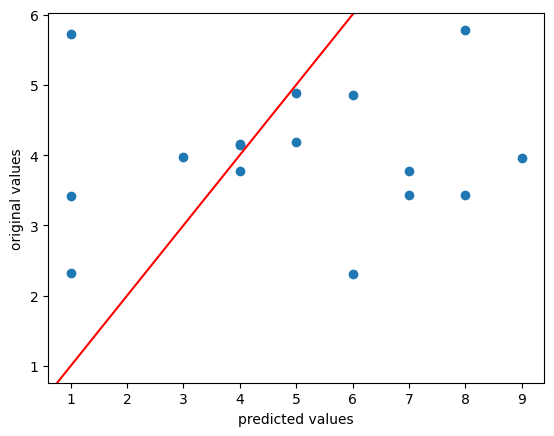

In [13]:
# predicted-vs-actual scatterplot
fig, ax = plt.subplots()
ax.scatter(y1_test.values, y1_pred.values)
plt.xlabel("predicted values")
plt.ylabel("original values")
ax.axline((1,1), slope=1, color = 'red')
plt.show()

### 5.5.2 Apply auto_arima() for multiple timeseries<a id='5.5.2'></a>

In [118]:
stores1 = [*range(1, 7, 1)] # No.1-6 stores
families1 = ['BREAD/BAKERY', 'DAIRY', 'GROCERY I']

grp = data.groupby(['store_nbr', 'family'])

df0 = pd.DataFrame()

for s in stores1:
    for f in families1:
        grp_sel = grp.get_group((s, f))
        col_name = str(s)+","+f
        df_temp = pd.DataFrame(grp_sel['sales']).rename(columns={'sales': col_name})
        df0 = pd.concat([df0, df_temp], axis=1)

df0.head()

,"1,BREAD/BAKERY","1,DAIRY","1,GROCERY I","2,BREAD/BAKERY","2,DAIRY","2,GROCERY I","3,BREAD/BAKERY","3,DAIRY","3,GROCERY I","4,BREAD/BAKERY","4,DAIRY","4,GROCERY I","5,BREAD/BAKERY","5,DAIRY","5,GROCERY I","6,BREAD/BAKERY","6,DAIRY","6,GROCERY I"
date,,,,,,,,,,,,,,,,,,
2013-01-01,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0
2013-01-02,470.652,579.0,2652.0,523.882,651.0,3870.0,1361.636,1606.0,8463.0,422.537,589.0,4087.0,566.917,414.0,4558.0,689.217,683.0,5535.0
2013-01-03,310.655,453.0,2121.0,321.693,461.0,2640.0,886.184,1377.0,6712.0,273.752,431.0,2824.0,377.887,366.0,3260.0,412.324,542.0,4040.0
2013-01-04,198.366,460.0,2056.0,299.012,480.0,2697.0,784.331,1244.0,5731.0,278.560,411.0,2688.0,335.761,309.0,3085.0,306.411,481.0,3314.0
2013-01-05,301.057,464.0,2216.0,385.333,620.0,3545.0,1066.981,1458.0,7823.0,371.690,660.0,3731.0,402.286,356.0,3398.0,502.045,654.0,4857.0


In [119]:
df0.shape

(1684, 18)

In [120]:
# Drop columns with more than 50% zeros
df1 = df0.loc[:, (df0==0).mean() < 0.5]

df1_train = df1[7:n_train] #starting from day 8
df1_test = df1[n_train:]

df1.shape

(1684, 18)

In [115]:
# N = len(df1.columns)
mAPE = []
for group in df1.columns:
    y_train = df1_train[group]
    y_test = df1_test[group]
    
    model = pm.auto_arima(y_train,                    
                      start_p=0, start_q=0, # minimum p and q
                      max_p=7, max_q=7,     # maximum p and q
                      max_order=10,#None,
                      test='adf',           # use adftest to find optimal 'd'
                      seasonal=True,
                      m=7,                   # seasonality: weekly
                      d=None,               # let model determine 'd' (order of first-differencing)
                      D=None,               # let model determine 'D' (order of the seasonal differencing)
                      trace=True,#False,           # print status on the fits
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
    
    y_pred = model.predict(y_test.shape[0])
    
    APE_y = abs( (y_test.values - y_pred.values) / y_test.values)
    mAPE_y = np.mean(APE_y)
    print(group+' MAPE: '+str(mAPE_y))
    
    mAPE.append(mAPE_y)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=20443.337, Time=1.42 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=21656.182, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=20011.965, Time=1.40 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=20595.747, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=26304.557, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=20519.116, Time=0.07 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=19841.982, Time=2.96 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=20191.987, Time=4.54 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=19990.183, Time=1.81 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=inf, Time=2.89 sec
 ARIMA(2,0,0)(2,0,0)[7] intercept   : AIC=19771.695, Time=3.23 sec
 ARIMA(2,0,0)(1,0,0)[7] intercept   : AIC=19873.088, Time=2.07 sec
 ARIMA(2,0,0)(2,0,1)[7] intercept   : AIC=19754.616, Time=4.70 sec
 ARIMA(2,0,0)(1,0,1)[7] intercept   : AIC=19790.916, Time=2.04 sec
 ARIMA(2,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=5.16 sec
 ARIMA(2,0,0)(1,0,2)[7] intercept   : AIC=19778.018, Time=4.21 sec
 ARIMA(3,0,0)(2,0,1)[7] intercept   : AIC=96.267, Time=21.99 sec
 ARIMA(3,0,0)(1,0,1)[7] intercept   : AIC=20526.583, Time=1.33 sec
 ARIMA(3,0,0)(2,0,0)[7] intercept   : AIC=inf, Time=12.21 sec
 ARIMA(3,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=6.90 sec
 ARIMA(3,0,0)(1,0,0)[7] intercept   : AIC=19862.546, Time=1.68 sec
 ARIMA(3,0,0)(1,0,2)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [44]:
df_mape = pd.DataFrame()
df_mape['Group'] = df1.columns[0:18]
df_mape['MAPE'] = mAPE
df_mape

,Group,MAPE
0,"1,BREAD/BAKERY",0.255695
1,"1,DAIRY",0.208831
2,"1,GROCERY I",0.279326
3,"2,BREAD/BAKERY",0.077630
4,"2,DAIRY",0.112331
5,"2,GROCERY I",0.145034
6,"3,BREAD/BAKERY",0.062670
7,"3,DAIRY",0.060861
8,"3,GROCERY I",0.114266
9,"4,BREAD/BAKERY",0.149449


In [50]:
df_mape.nsmallest(5, 'MAPE')

,Group,MAPE
7,"3,DAIRY",0.060861
6,"3,BREAD/BAKERY",0.062670
13,"5,DAIRY",0.067990
3,"2,BREAD/BAKERY",0.077630
16,"6,DAIRY",0.078738


In [51]:
df_mape.nlargest(5, 'MAPE')

,Group,MAPE
2,"1,GROCERY I",0.279326
0,"1,BREAD/BAKERY",0.255695
1,"1,DAIRY",0.208831
11,"4,GROCERY I",0.173353
9,"4,BREAD/BAKERY",0.149449


### 5.5.3 Apply Prophet() for single timeseries<a id='5.5.3'></a>

In [52]:
df_fb = df.reset_index()

n_train = len(df_fb)-16
df_fb_train = df_fb[7:n_train] #starting from day 8
df_fb_test = df_fb[n_train:]

In [53]:
y1_train_fb = df_fb_train[["date", "1,AUTOMOTIVE"]] # first column
y1_test_fb = df_fb_test[["date", "1,AUTOMOTIVE"]]

In [54]:
y1_train_fb.columns = ['ds','y']
y1_test_fb.columns = ['ds','y']
y1_train_fb.head()

,ds,y
7,2013-01-08,2.0
8,2013-01-09,2.0
9,2013-01-10,2.0
10,2013-01-11,3.0
11,2013-01-12,2.0


In [55]:
model_prophet = Prophet()
model_prophet.fit(y1_train_fb)

09:28:54 - cmdstanpy - INFO - Chain [1] start processing
09:28:55 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
 date = '2017-07%08d' % i
 future.append([date])
 print(date)
# future = DataFrame(future)
# future.columns = ['ds']
# future['ds']= to_datetime(future['ds'])
# # use the model to make a forecast
# forecast = model.predict(future)
# # summarize the forecast
# print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# # plot forecast
# model.plot(forecast)
# pyplot.show()

2017-0700000001
2017-0700000002
2017-0700000003
2017-0700000004
2017-0700000005
2017-0700000006
2017-0700000007
2017-0700000008
2017-0700000009
2017-0700000010
2017-0700000011
2017-0700000012


In [58]:
y1_pred_fb = model_prophet.predict(y1_test_fb)  # predict N steps into the future
y1_pred_fb[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-07-31,4.698622,1.198949,7.818916
1,2017-08-01,5.270555,2.028115,8.553184
2,2017-08-02,4.885589,1.691329,8.219604
3,2017-08-03,4.367451,1.045556,7.395130
4,2017-08-04,5.090726,1.673747,8.240536


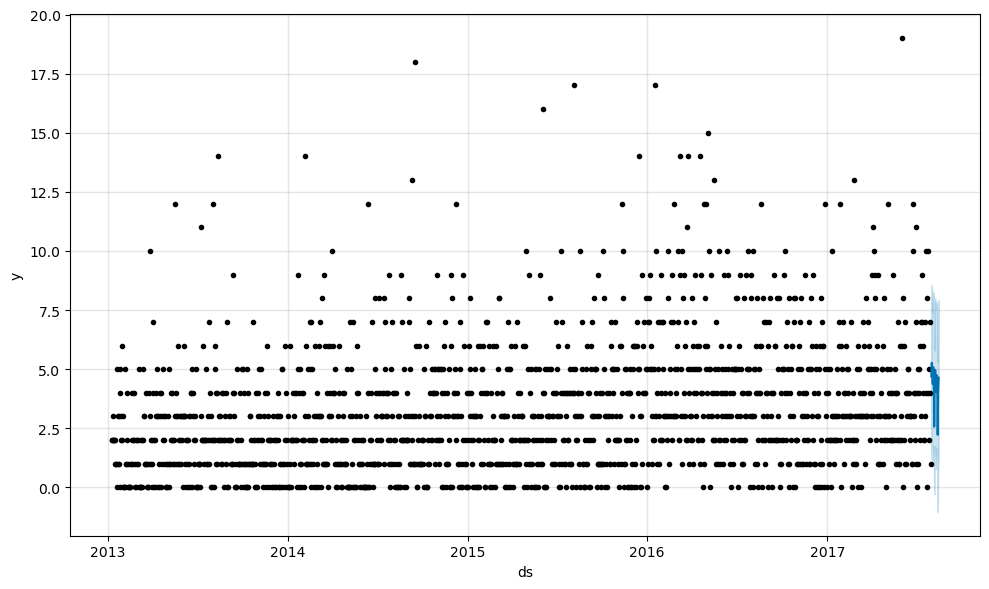

In [59]:
model_prophet.plot(y1_pred_fb)
plt.show()

In [60]:
# APE = ABS((actual - predicted) / actual)
APE_y1 = abs( (y1_test.values - y1_pred_fb['yhat'].values) / y1_test.values)

# MEAN(APE)
mAPE_y1 = np.mean(APE_y1)
print('MAPE: '+str(mAPE_y1))

MAPE: 0.7533845415421063
